In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [2]:
data = pd.read_csv('/Users/andres/Desktop/datos/nyc_taxi_hw .csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   key                100000 non-null  object 
 2   fare_amount        100000 non-null  float64
 3   pickup_datetime    100000 non-null  object 
 4   pickup_longitude   100000 non-null  float64
 5   pickup_latitude    100000 non-null  float64
 6   dropoff_longitude  100000 non-null  float64
 7   dropoff_latitude   100000 non-null  float64
 8   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [5]:
data['key'] = pd.to_datetime(data['key'])
data['key'].iloc[0]

Timestamp('2009-06-15 17:26:21.000000100')

In [6]:
data["hour"] = data["key"].dt.hour
data["day_of_week"] = data["key"].dt.dayofweek
data["month"] = data["key"].dt.month
data["year"] = data["key"].dt.year

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         100000 non-null  int64         
 1   key                100000 non-null  datetime64[ns]
 2   fare_amount        100000 non-null  float64       
 3   pickup_datetime    100000 non-null  object        
 4   pickup_longitude   100000 non-null  float64       
 5   pickup_latitude    100000 non-null  float64       
 6   dropoff_longitude  100000 non-null  float64       
 7   dropoff_latitude   100000 non-null  float64       
 8   passenger_count    100000 non-null  int64         
 9   hour               100000 non-null  int32         
 10  day_of_week        100000 non-null  int32         
 11  month              100000 non-null  int32         
 12  year               100000 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(4), i

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_datetime'].iloc[0]

Timestamp('2009-06-15 17:26:21+0000', tz='UTC')

In [9]:
data["hour"] = data["pickup_datetime"].dt.hour
data["day_of_week"] = data["pickup_datetime"].dt.dayofweek
data["month"] = data["pickup_datetime"].dt.month
data["year"] = data["pickup_datetime"].dt.year

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         100000 non-null  int64              
 1   key                100000 non-null  datetime64[ns]     
 2   fare_amount        100000 non-null  float64            
 3   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   100000 non-null  float64            
 5   pickup_latitude    100000 non-null  float64            
 6   dropoff_longitude  100000 non-null  float64            
 7   dropoff_latitude   100000 non-null  float64            
 8   passenger_count    100000 non-null  int64              
 9   hour               100000 non-null  int32              
 10  day_of_week        100000 non-null  int32              
 11  month              100000 non-null  int32              
 12  year               100000 non-n

In [11]:
data.drop(['pickup_datetime'], axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         100000 non-null  int64         
 1   key                100000 non-null  datetime64[ns]
 2   fare_amount        100000 non-null  float64       
 3   pickup_longitude   100000 non-null  float64       
 4   pickup_latitude    100000 non-null  float64       
 5   dropoff_longitude  100000 non-null  float64       
 6   dropoff_latitude   100000 non-null  float64       
 7   passenger_count    100000 non-null  int64         
 8   hour               100000 non-null  int32         
 9   day_of_week        100000 non-null  int32         
 10  month              100000 non-null  int32         
 11  year               100000 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(2)
memory usage: 7.6 MB


In [13]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                100000 non-null  datetime64[ns]
 1   fare_amount        100000 non-null  float64       
 2   pickup_longitude   100000 non-null  float64       
 3   pickup_latitude    100000 non-null  float64       
 4   dropoff_longitude  100000 non-null  float64       
 5   dropoff_latitude   100000 non-null  float64       
 6   passenger_count    100000 non-null  int64         
 7   hour               100000 non-null  int32         
 8   day_of_week        100000 non-null  int32         
 9   month              100000 non-null  int32         
 10  year               100000 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(1)
memory usage: 6.9 MB


In [15]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010


In [16]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['time_of_day'] = data['hour'].apply(get_time_of_day)

In [17]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009,Evening
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,Afternoon
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,Night
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,Night
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,Morning


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                100000 non-null  datetime64[ns]
 1   fare_amount        100000 non-null  float64       
 2   pickup_longitude   100000 non-null  float64       
 3   pickup_latitude    100000 non-null  float64       
 4   dropoff_longitude  100000 non-null  float64       
 5   dropoff_latitude   100000 non-null  float64       
 6   passenger_count    100000 non-null  int64         
 7   hour               100000 non-null  int32         
 8   day_of_week        100000 non-null  int32         
 9   month              100000 non-null  int32         
 10  year               100000 non-null  int32         
 11  time_of_day        100000 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(4), int64(1), object(1)
memory usage: 7.6+ MB


In [19]:
data['passenger_count'] = data['passenger_count'].astype('int32')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                100000 non-null  datetime64[ns]
 1   fare_amount        100000 non-null  float64       
 2   pickup_longitude   100000 non-null  float64       
 3   pickup_latitude    100000 non-null  float64       
 4   dropoff_longitude  100000 non-null  float64       
 5   dropoff_latitude   100000 non-null  float64       
 6   passenger_count    100000 non-null  int32         
 7   hour               100000 non-null  int32         
 8   day_of_week        100000 non-null  int32         
 9   month              100000 non-null  int32         
 10  year               100000 non-null  int32         
 11  time_of_day        100000 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 7.2+ MB


In [21]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009,Evening
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,Afternoon
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,Night
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,Night
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,Morning


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                100000 non-null  datetime64[ns]
 1   fare_amount        100000 non-null  float64       
 2   pickup_longitude   100000 non-null  float64       
 3   pickup_latitude    100000 non-null  float64       
 4   dropoff_longitude  100000 non-null  float64       
 5   dropoff_latitude   100000 non-null  float64       
 6   passenger_count    100000 non-null  int32         
 7   hour               100000 non-null  int32         
 8   day_of_week        100000 non-null  int32         
 9   month              100000 non-null  int32         
 10  year               100000 non-null  int32         
 11  time_of_day        100000 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 7.2+ MB


In [23]:
data = data[data['passenger_count'] != 0]

In [24]:
datos_pasajeros_cero = data[data['passenger_count'] == 0]

In [25]:
datos_pasajeros_cero.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99634 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                99634 non-null  datetime64[ns]
 1   fare_amount        99634 non-null  float64       
 2   pickup_longitude   99634 non-null  float64       
 3   pickup_latitude    99634 non-null  float64       
 4   dropoff_longitude  99634 non-null  float64       
 5   dropoff_latitude   99634 non-null  float64       
 6   passenger_count    99634 non-null  int32         
 7   hour               99634 non-null  int32         
 8   day_of_week        99634 non-null  int32         
 9   month              99634 non-null  int32         
 10  year               99634 non-null  int32         
 11  time_of_day        99634 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 8.0+ MB


In [27]:
datos_precio_cero = data[data['fare_amount'] == 0]

In [28]:
datos_precio_cero.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day
10002,2010-02-15 14:26:01.000000300,0.0,-73.987115,40.738808,-74.005911,40.713960,1,14,0,2,2010,Afternoon
27891,2015-05-15 21:40:28.000000100,0.0,-74.077927,40.805714,-74.077919,40.805721,1,21,4,5,2015,Night
47302,2010-03-18 19:13:39.000000200,0.0,-73.942346,40.806269,-73.942463,40.806129,1,19,3,3,2010,Evening


In [29]:
data = data[data['fare_amount'] != 0]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99631 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                99631 non-null  datetime64[ns]
 1   fare_amount        99631 non-null  float64       
 2   pickup_longitude   99631 non-null  float64       
 3   pickup_latitude    99631 non-null  float64       
 4   dropoff_longitude  99631 non-null  float64       
 5   dropoff_latitude   99631 non-null  float64       
 6   passenger_count    99631 non-null  int32         
 7   hour               99631 non-null  int32         
 8   day_of_week        99631 non-null  int32         
 9   month              99631 non-null  int32         
 10  year               99631 non-null  int32         
 11  time_of_day        99631 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 8.0+ MB


In [31]:
datos_precio_menos = data[data['fare_amount'] <= 0]

In [32]:
datos_precio_menos.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day
2039,2010-03-09 23:37:10.000000500,-2.9,-73.789450,40.643498,-73.788665,40.641952,1,23,1,3,2010,Night
2486,2015-03-22 05:14:27.000000100,-2.5,-74.000031,40.720631,-73.999809,40.720539,1,5,6,3,2015,Morning
13032,2013-08-30 08:57:10.000000200,-3.0,-73.995062,40.740755,-73.995885,40.741357,4,8,4,8,2013,Morning
28839,2013-08-11 13:39:10.000000100,-2.5,-73.785260,40.648442,0.000000,0.000000,1,13,6,8,2013,Afternoon
36722,2015-04-30 15:19:45.000000300,-2.5,-73.952187,40.790112,-73.950043,40.792839,1,15,3,4,2015,Afternoon


In [33]:
data = data[data['fare_amount'] >= 0]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99622 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                99622 non-null  datetime64[ns]
 1   fare_amount        99622 non-null  float64       
 2   pickup_longitude   99622 non-null  float64       
 3   pickup_latitude    99622 non-null  float64       
 4   dropoff_longitude  99622 non-null  float64       
 5   dropoff_latitude   99622 non-null  float64       
 6   passenger_count    99622 non-null  int32         
 7   hour               99622 non-null  int32         
 8   day_of_week        99622 non-null  int32         
 9   month              99622 non-null  int32         
 10  year               99622 non-null  int32         
 11  time_of_day        99622 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 8.0+ MB


In [35]:
valores_cero = data[(data['pickup_longitude'] == 0) | (data['pickup_latitude'] == 0) | (data['dropoff_longitude'] == 0) | (data['dropoff_latitude'] == 0)]

In [36]:
valores_cero.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day
11,2012-12-24 11:24:00.000000980,5.5,0.0,0.0,0.0,0.0,3,11,0,12,2012,Morning
15,2013-11-23 12:57:00.000000190,5.0,0.0,0.0,0.0,0.0,1,12,5,11,2013,Afternoon
26,2011-02-07 20:01:00.000000114,6.5,0.0,0.0,0.0,0.0,1,20,0,2,2011,Evening
124,2013-01-17 17:22:00.000000430,8.0,0.0,0.0,0.0,0.0,2,17,3,1,2013,Evening
192,2010-09-05 17:08:00.000000920,3.7,0.0,0.0,0.0,0.0,5,17,6,9,2010,Evening


In [37]:
data = data[(data['pickup_longitude'] != 0) & (data['pickup_latitude'] != 0) & (data['dropoff_longitude'] != 0) & (data['dropoff_latitude'] != 0)]


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97625 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                97625 non-null  datetime64[ns]
 1   fare_amount        97625 non-null  float64       
 2   pickup_longitude   97625 non-null  float64       
 3   pickup_latitude    97625 non-null  float64       
 4   dropoff_longitude  97625 non-null  float64       
 5   dropoff_latitude   97625 non-null  float64       
 6   passenger_count    97625 non-null  int32         
 7   hour               97625 non-null  int32         
 8   day_of_week        97625 non-null  int32         
 9   month              97625 non-null  int32         
 10  year               97625 non-null  int32         
 11  time_of_day        97625 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(5), object(1)
memory usage: 7.8+ MB


In [39]:
pickup_coords = data[['pickup_latitude', 'pickup_longitude']]
dropoff_coords = data[['dropoff_latitude', 'dropoff_longitude']]

distances = []
for pickup, dropoff in zip(pickup_coords.values, dropoff_coords.values):
    try:
        distance = geodesic((pickup[0], pickup[1]), (dropoff[0], dropoff[1])).kilometers
        distances.append(distance)
    except ValueError:
        distances.append(None)

data['distance_km'] = distances

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


In [40]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year,time_of_day,distance_km
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009,Evening,1.029601
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,Afternoon,8.443441
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,Night,1.389132
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,Night,2.795790
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,Morning,1.998338


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97625 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                97625 non-null  datetime64[ns]
 1   fare_amount        97625 non-null  float64       
 2   pickup_longitude   97625 non-null  float64       
 3   pickup_latitude    97625 non-null  float64       
 4   dropoff_longitude  97625 non-null  float64       
 5   dropoff_latitude   97625 non-null  float64       
 6   passenger_count    97625 non-null  int32         
 7   hour               97625 non-null  int32         
 8   day_of_week        97625 non-null  int32         
 9   month              97625 non-null  int32         
 10  year               97625 non-null  int32         
 11  time_of_day        97625 non-null  object        
 12  distance_km        97623 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usage

In [42]:
datoskmcero = data[data['distance_km'] == 0]

In [46]:
print(datoskmcero.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 105 to 99793
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                1079 non-null   datetime64[ns]
 1   fare_amount        1079 non-null   float64       
 2   pickup_longitude   1079 non-null   float64       
 3   pickup_latitude    1079 non-null   float64       
 4   dropoff_longitude  1079 non-null   float64       
 5   dropoff_latitude   1079 non-null   float64       
 6   passenger_count    1079 non-null   int32         
 7   hour               1079 non-null   int32         
 8   day_of_week        1079 non-null   int32         
 9   month              1079 non-null   int32         
 10  year               1079 non-null   int32         
 11  time_of_day        1079 non-null   object        
 12  distance_km        1079 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usag

In [47]:
data = data[data['distance_km'] != 0]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96546 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                96546 non-null  datetime64[ns]
 1   fare_amount        96546 non-null  float64       
 2   pickup_longitude   96546 non-null  float64       
 3   pickup_latitude    96546 non-null  float64       
 4   dropoff_longitude  96546 non-null  float64       
 5   dropoff_latitude   96546 non-null  float64       
 6   passenger_count    96546 non-null  int32         
 7   hour               96546 non-null  int32         
 8   day_of_week        96546 non-null  int32         
 9   month              96546 non-null  int32         
 10  year               96546 non-null  int32         
 11  time_of_day        96546 non-null  object        
 12  distance_km        96544 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usage

In [50]:
print(data['distance_km'].describe())

Q1 = data['distance_km'].quantile(0.25)
Q3 = data['distance_km'].quantile(0.75)
IQR = Q3 - Q1
filtro_atipico = (data['distance_km'] < (Q1 - 1.5 * IQR)) | (data['distance_km'] > (Q3 + 1.5 * IQR))
valores_atipicos = data[filtro_atipico]
print("Valores atípicos:")
print(valores_atipicos)

count    96544.000000
mean         4.160893
std         62.685071
min          0.000084
25%          1.281617
50%          2.184853
75%          3.963826
max       6039.183489
Name: distance_km, dtype: float64
Valores atípicos:
                                key  fare_amount  pickup_longitude  \
1     2010-01-05 16:52:16.000000200        16.90        -74.016048   
32    2009-01-09 16:10:00.000000170        31.90        -73.873027   
35    2015-01-11 03:15:38.000000100        58.00        -73.983330   
54    2013-11-10 01:12:19.000000200        25.50        -73.974497   
56    2010-05-31 18:06:00.000000970        34.67        -73.985427   
...                             ...          ...               ...   
99950 2013-04-27 15:19:33.000000500        31.00        -73.997256   
99955 2011-09-01 04:27:14.000000100        16.50        -73.947797   
99957 2014-06-03 20:26:00.000000890        33.33        -73.870830   
99962 2010-01-13 20:00:00.000000670        27.20        -73.874533   
99

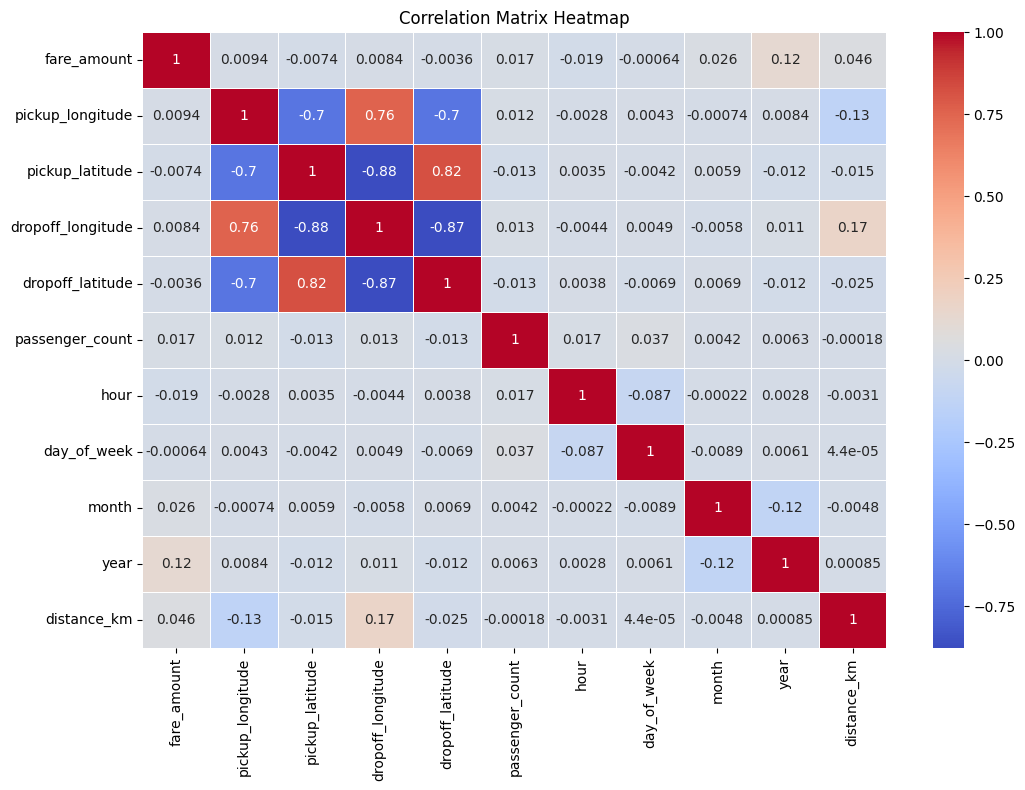

In [51]:
numeric_df = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96546 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                96546 non-null  datetime64[ns]
 1   fare_amount        96546 non-null  float64       
 2   pickup_longitude   96546 non-null  float64       
 3   pickup_latitude    96546 non-null  float64       
 4   dropoff_longitude  96546 non-null  float64       
 5   dropoff_latitude   96546 non-null  float64       
 6   passenger_count    96546 non-null  int32         
 7   hour               96546 non-null  int32         
 8   day_of_week        96546 non-null  int32         
 9   month              96546 non-null  int32         
 10  year               96546 non-null  int32         
 11  time_of_day        96546 non-null  object        
 12  distance_km        96544 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usage

In [53]:
def plot_count_by_category(data, category):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=category,
        y='count',
        data=data.groupby(category).size().reset_index(name='count'),
        palette='viridis'
    )
    plt.xlabel(category.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count of Trips by {category.capitalize()}')
    plt.show()

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/390348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


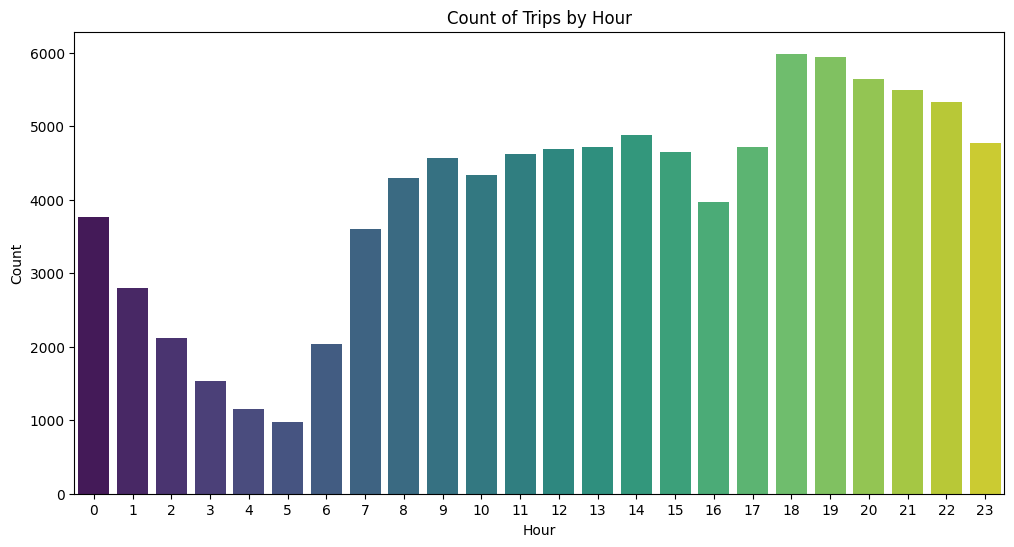

In [54]:
plot_count_by_category(data, 'hour')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/390348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


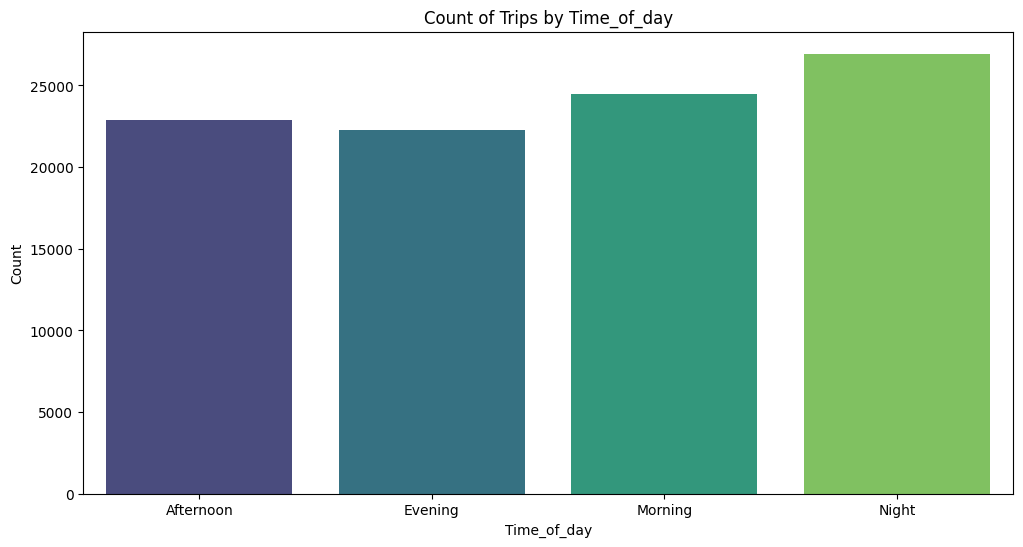

In [55]:
plot_count_by_category(data, 'time_of_day')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/390348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


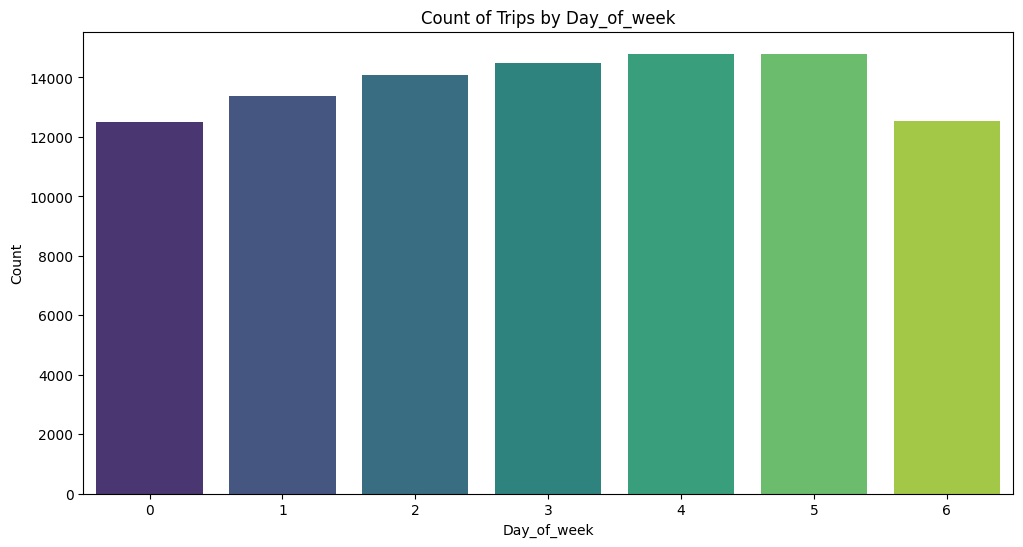

In [56]:
plot_count_by_category(data, 'day_of_week')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/390348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


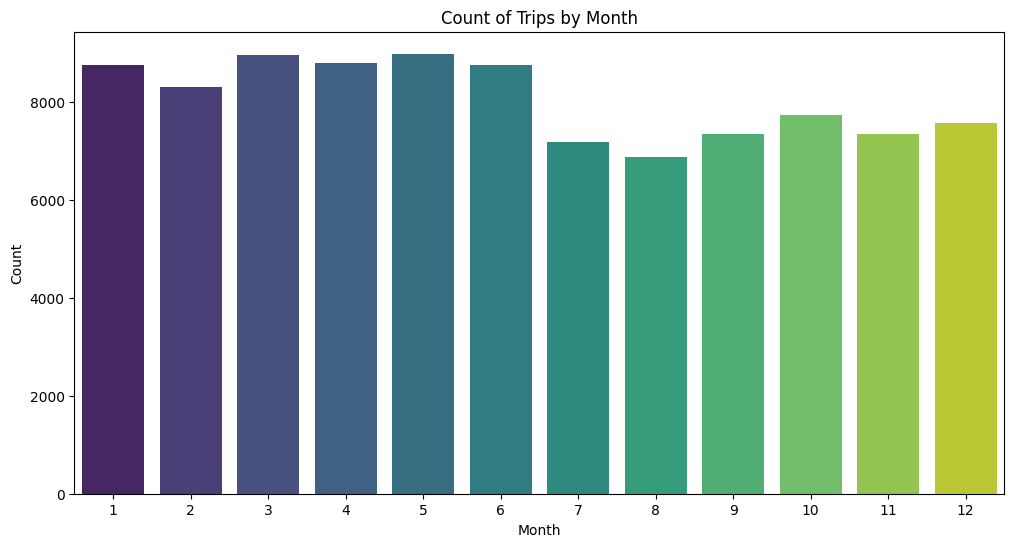

In [57]:
plot_count_by_category(data, 'month')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/390348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


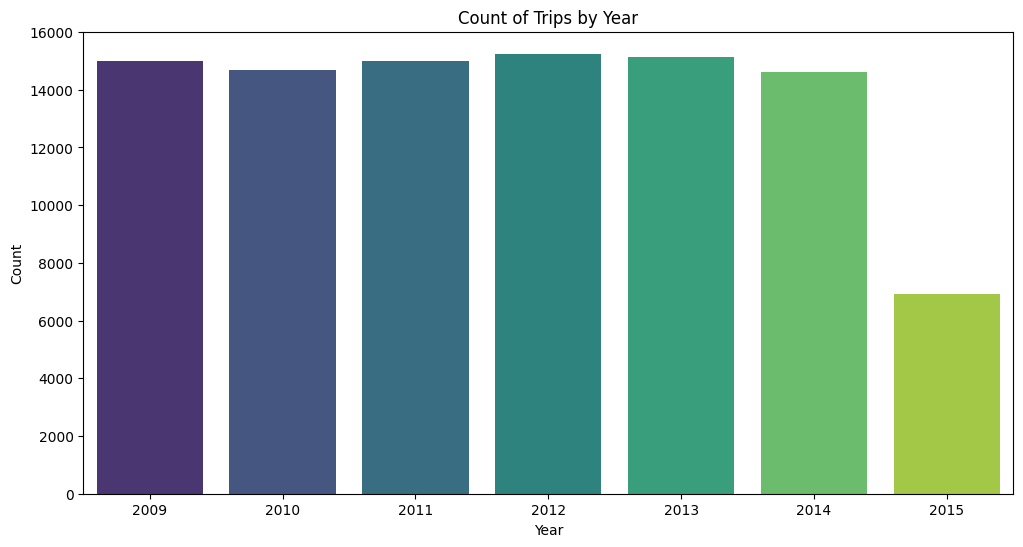

In [58]:
plot_count_by_category(data, 'year')

In [59]:
fechamax = data['key'].max()
print(fechamax)

2015-06-30 22:54:07.000000500


In [64]:
def plot_avg_price_by_category(data, category):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=category,
        y='fare_amount',
        data=data.groupby(category)['fare_amount'].mean().reset_index(),
        palette='viridis'
    )
    plt.xlabel(category.capitalize())
    plt.ylabel('Precio Promedio')
    plt.title(f'Precio Promedio por {category.capitalize()}')
    plt.show()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96546 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                96546 non-null  datetime64[ns]
 1   fare_amount        96546 non-null  float64       
 2   pickup_longitude   96546 non-null  float64       
 3   pickup_latitude    96546 non-null  float64       
 4   dropoff_longitude  96546 non-null  float64       
 5   dropoff_latitude   96546 non-null  float64       
 6   passenger_count    96546 non-null  int32         
 7   hour               96546 non-null  int32         
 8   day_of_week        96546 non-null  int32         
 9   month              96546 non-null  int32         
 10  year               96546 non-null  int32         
 11  time_of_day        96546 non-null  object        
 12  distance_km        96544 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usage

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/1768201655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


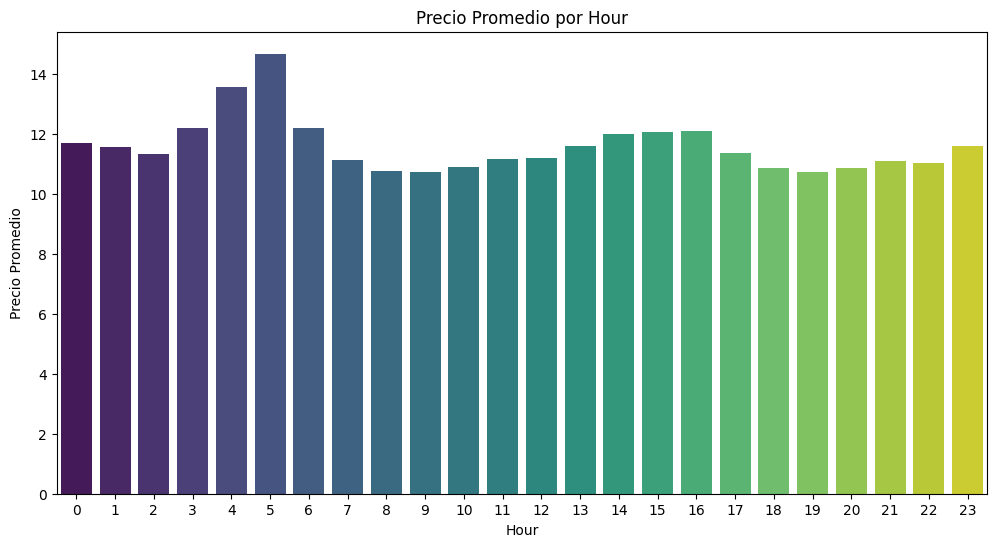

In [67]:
plot_avg_price_by_category(data, 'hour')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/1768201655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


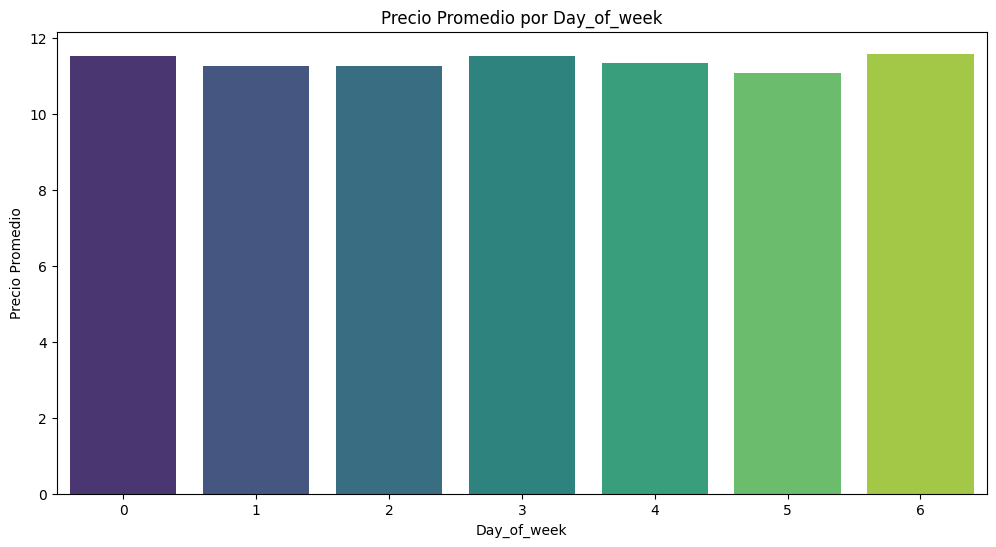

In [68]:
plot_avg_price_by_category(data, 'day_of_week')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/1768201655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


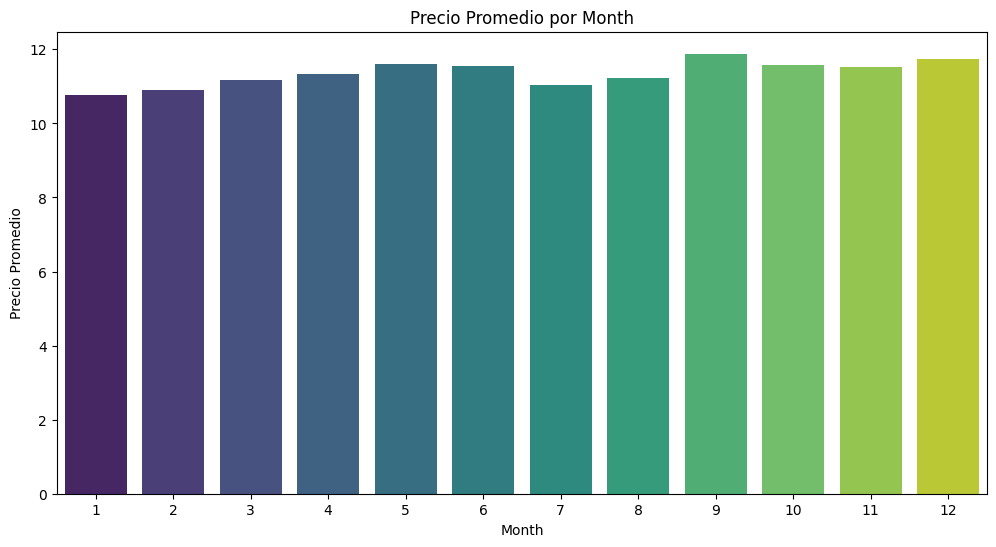

In [69]:
plot_avg_price_by_category(data, 'month')

/var/folders/23/w6fr8w891t9_w00rgvh2hc9w0000gn/T/ipykernel_54196/1768201655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


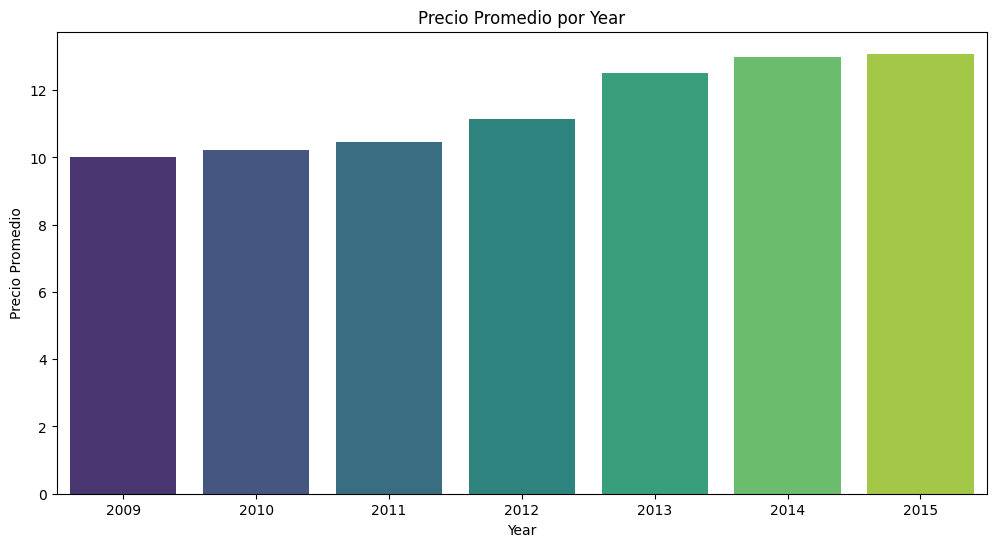

In [70]:
plot_avg_price_by_category(data, 'year')

In [83]:
df_limpiado = data.dropna()

X = df_limpiado[['passenger_count', 'hour', 'day_of_week', 'month', 'year', 'distance_km']]
y = df_limpiado['fare_amount']

modelo.fit(X, y)


LinearRegression()

In [85]:
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

modelo.fit(X_imputado, y)

nueva_instancia = X_imputado[0].reshape(1, -1) 
prediccion = modelo.predict(nueva_instancia)
print('Predicción de tarifa:', prediccion[0])

Predicción de tarifa: 9.405917019823164


In [86]:
predicciones = modelo.predict(X)

mse = mean_squared_error(y, predicciones)
mae = mean_absolute_error(y, predicciones)
r2 = r2_score(y, predicciones)

print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R^2):', r2)

Error cuadrático medio (MSE): 90.40721546082786
Error absoluto medio (MAE): 5.922590579934248
Coeficiente de determinación (R^2): 0.01885069029958164


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [87]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp_regressor.fit(X_train_scaled, y_train)

y_pred = mlp_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrático medio (MSE): 20.736244716072008
Error absoluto medio (MAE): 2.11280617373501
Coeficiente de determinación (R^2): 0.7670390501035936
